# DEEP LEARNING REGRESSION 

## Problem statement 
 below is a dataset that we will be using to predict the price of insurance we will be explaining the columns shortly 

 ### In the below model we wil be looking at the insurance prices one  pays to an insurance company(value of premiums)  .A health insurance is based in some several factors  . In the foollowing dataset the factors include :
1.Age - Ba sed on the age of the customer we can be able to determine the value of premiums one will pay in normal scenario the older one is the higher the premium rate is likely to be.

2.Sex - Based on sex we can be able to determine the amount one will indeed pay as premiums  .Will one pay more as a male while compared to a female? we will answer this question when we plot a correlation matrix and feature importance plot. 

3.BMI - BMI (Body Mass Index) is a commonly used measure to assess a person's 
  weight status and is calculated using the following formula:

  BMI = weight / (height^2)

  where weight is in kilograms and height is in meters. BMI is a numerical value that provides an indication of whether a person   is underweight, normal weight, overweight, or obese.

  The BMI categories are generally defined as follows:

  Underweight: BMI < 18.5
  Normal weight: 18.5 <= BMI < 25
  Overweight: 25 <= BMI < 30
  Obese: BMI >= 30 .

4 .Number of children - based on the number of children we can be able do determine whether one will pay higher premiumns or not   which ideally is the case.

5 Region - We will look where each customer comes from and based on region one comes from can we really  predict the  amount     one will pay as premiums? we wil se shortly whether the region one comes from really affects the insurance premium

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from __future__ import absolute_import, division, print_function

import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import   layers


In [69]:
print(tf.__version__)

2.12.0


In [70]:
df =pd.read_csv("insurance.csv")

In [71]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [72]:
df.isnull().sum().sum()

0

C:\Users\stilinski\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


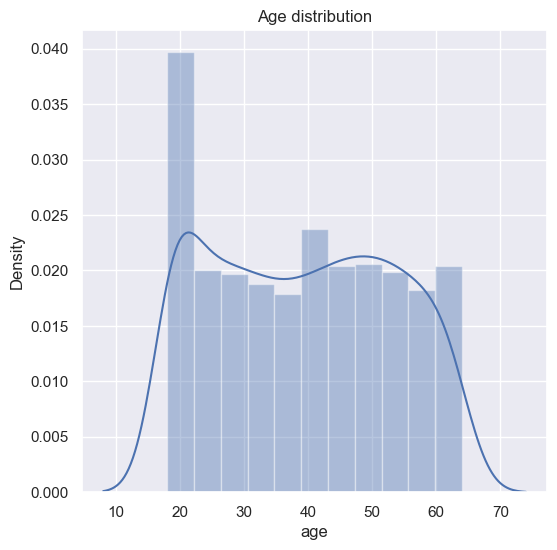

In [87]:
# below we will be looking for the age distribution using a distplot

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age distribution')
plt.show()

###  well our  customers age is not skewed to any direction ad is distributed almost fairly more young people are insuring thats for sure and mid 40's and also 60's

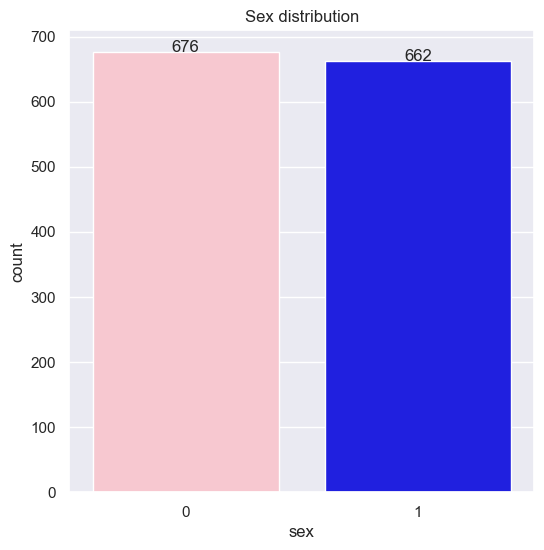

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))

# Set the color palette for the countplot
colors = {'female': 'pink', 'male': 'blue'}
sns.set_palette(colors.values())

ax = sns.countplot(x='sex', data=df)
plt.title('Sex distribution')

# Add the count values as text on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha="center")

plt.show()

###  In the above plot we can really see that more male are taking insurance covers than their feamle counterparts

C:\Users\stilinski\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


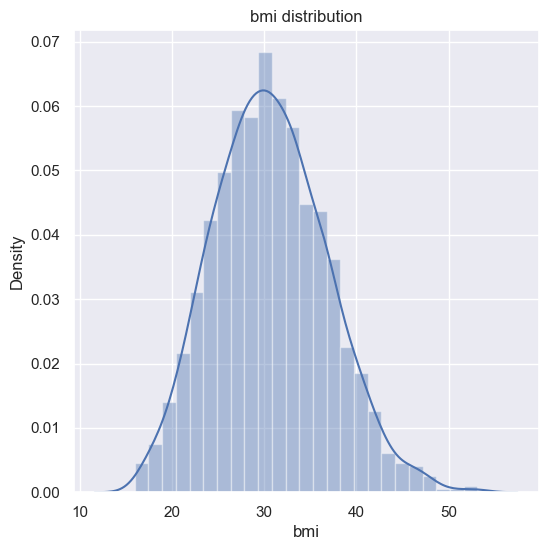

In [89]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('bmi distribution')
plt.show()

###  Our customers bmi is mainly from 25 to oround 38  from the information i gave above while discussing the problem statement is that from 25 -30 they are overweight  and past 30 they are obese thus most of our patients are taking  insurance cover beacuse they are not in good sahape and some may have more fears  and we can outrightly predict that a higher obese would actually attract a higher premium rate charge

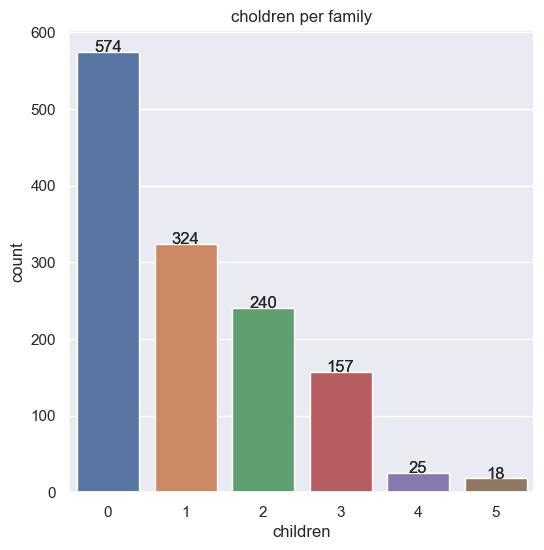

In [90]:
#in the code below we will be looking for the value of each count of each family and number of children using a countplot
plt.figure(figsize =(6,6))
sns.countplot(x='children',data=df)
plt.title('choldren per family')
ax = sns.countplot(x='children', data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha="center")

plt.show()

###  Most  patients are childless and this could be brought about by some could still be single thus as we looked before we saw that most people are in thie twenties .

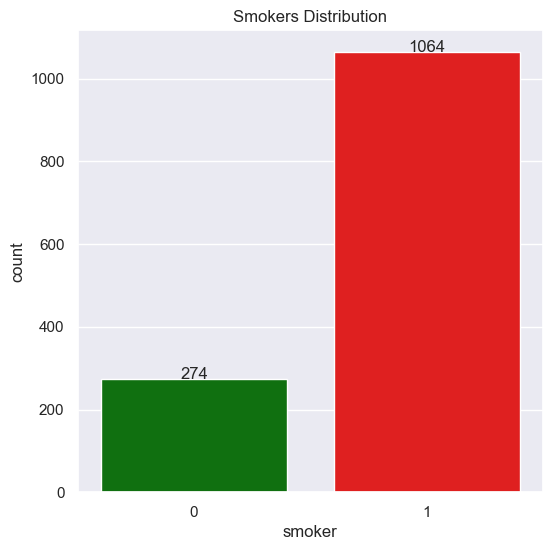

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))

# Set the color palette for the countplot
colors = {'yes': 'green', 'no': 'red'}
sns.set_palette(colors.values())

ax = sns.countplot(x='smoker', data=df)
plt.title('Smokers Distribution')

# Add the count values as text on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha="center")

plt.show()

### In the above plot we have the distribution of smokers though not by sex but we apparently have less smokers. Thus by default a smoker has a higher risk of diseases and thus we expect the insurance premiums to be higher

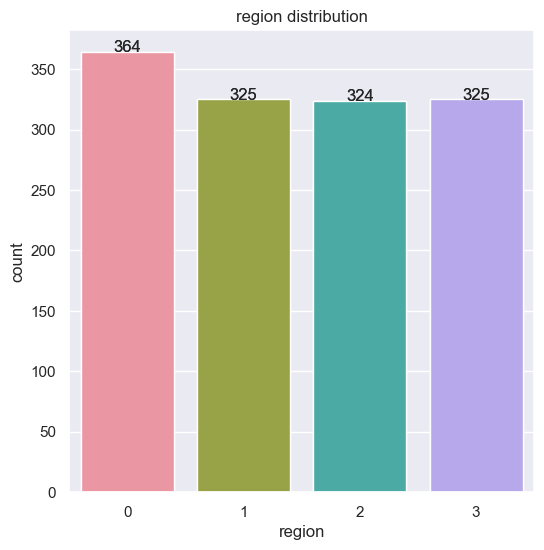

In [92]:
# Below we willl be looking for a count  of the values from each region using a countplot

plt.figure(figsize =(6,6))
sns.countplot(x='region',data=df)
plt.title('region distribution')
ax = sns.countplot(x='region', data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha="center")

plt.show()

C:\Users\stilinski\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


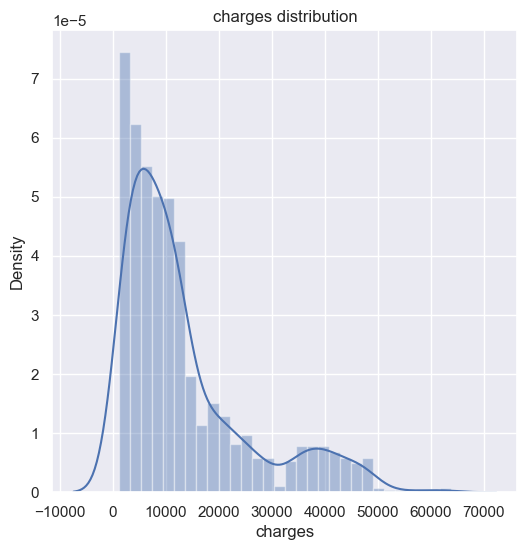

In [93]:
#below we will be looking for the charges distribution using  a distplot

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('charges distribution')
plt.show()

### The charges distributiion are left skewed thus the insurance cost is generally lower and this may also be a  factor ( its affordable)

### since models dont actually understand non-numeric data we will encode our data and change it to numeric form

In [73]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [ ]:
### in the following model we will be using 80% to train our model

In [74]:
train=df.sample(frac=0.8,random_state =0)
test=df.drop(train.index)

In [75]:
train_stats =train.describe()
train_stats.pop('charges')

train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
age,1070.0,39.036449,14.142122,18.00,26.000,39.000,51.0,64.00
sex,1070.0,0.501869,0.500230,0.00,0.000,1.000,1.0,1.00
bmi,1070.0,30.735164,6.064314,15.96,26.315,30.495,34.8,53.13
children,1070.0,1.093458,1.211364,0.00,0.000,1.000,2.0,5.00
smoker,1070.0,0.800935,0.399484,0.00,1.000,1.000,1.0,1.00
region,1070.0,1.438318,1.131829,0.00,0.000,1.000,2.0,3.00


In [76]:
train_labels=train.pop("charges")
test_labels =test.pop("charges")

In [77]:
def norm(x):
    return(x-train_stats["mean"])/train_stats["std"]
norm_train_data = norm(train)

norm_test_data = norm(test)


In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

model = build_model()


In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                448       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [53]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch % 100==0:print('')
        print('.',end='')
        
EPOCHS =1000

history =model.fit(
  norm_train_data ,train_labels,
  epochs =EPOCHS,validation_split =0.2,verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [54]:
hist =pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail(10)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
990,16596311.0,2200.268311,16596311.0,18866426.0,2301.895508,18866426.0,990
991,16602082.0,2225.479248,16602082.0,18869356.0,2274.130615,18869358.0,991
992,16602313.0,2190.970459,16602313.0,18839828.0,2291.708008,18839828.0,992
993,16596254.0,2219.088135,16596254.0,18854736.0,2275.330078,18854736.0,993
994,16605253.0,2185.230469,16605253.0,18830350.0,2292.970459,18830350.0,994
995,16591004.0,2191.726318,16591004.0,18839400.0,2312.740234,18839400.0,995
996,16582631.0,2226.511963,16582631.0,18843958.0,2294.767334,18843958.0,996
997,16579964.0,2222.996582,16579964.0,18871860.0,2266.460205,18871860.0,997
998,16573249.0,2229.136719,16573249.0,18906354.0,2229.902100,18906354.0,998
999,16593028.0,2173.708984,16593028.0,18840048.0,2275.621826,18840048.0,999


In [59]:
 print(hist.columns)

Index(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse', 'epoch'], dtype='object')



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

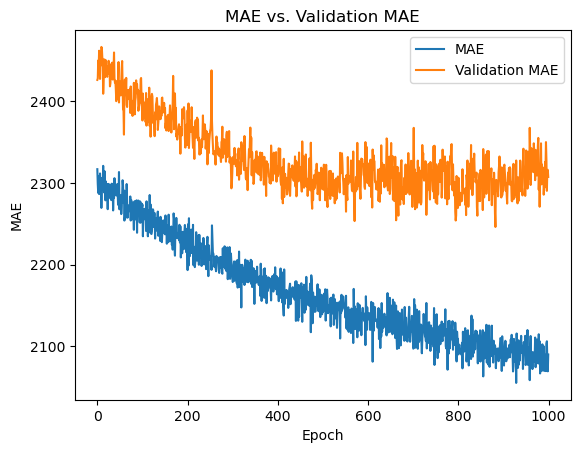

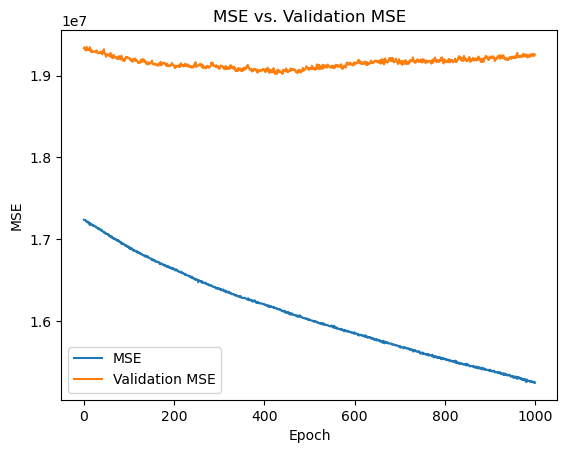

In [80]:
import matplotlib.pyplot as plt

# Your existing code

history = model.fit(
  norm_train_data, train_labels,
  epochs=EPOCHS, validation_split=0.2, verbose=0,
  callbacks=[PrintDot()]
)

hist = pd.DataFrame(history.history)

# Plotting MAE and Validation MAE
plt.figure()
plt.plot(hist['mae'], label='MAE')
plt.plot(hist['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE vs. Validation MAE')
plt.legend()

# Plotting MSE and Validation MSE
plt.figure()
plt.plot(hist['mse'], label='MSE')
plt.plot(hist['val_mse'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE vs. Validation MSE')
plt.legend()

plt.show()


## As we can see our model is not perfoming and this may be due to instancces of overfitting and thats why our validation mae and validation mse are tending to become constant thus we will tune our mode and use early stopping as our parameter where if the  model notices that its perfomance is not improving then the model stops training  we will see the implementation in the below code

In [82]:
model  =build_model()
early_stop =keras.callbacks.EarlyStopping(monitor='val_loss',patience =10)
history =model.fit(norm_train_data,train_labels,epochs =EPOCHS,
                  validation_split =0.2,verbose=0,callbacks=[early_stop,PrintDot()])
plt_history(history)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..................................................

NameError: name 'plt_history' is not defined


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

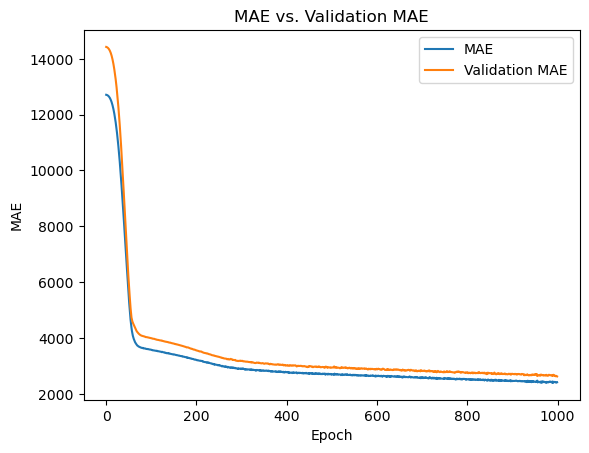

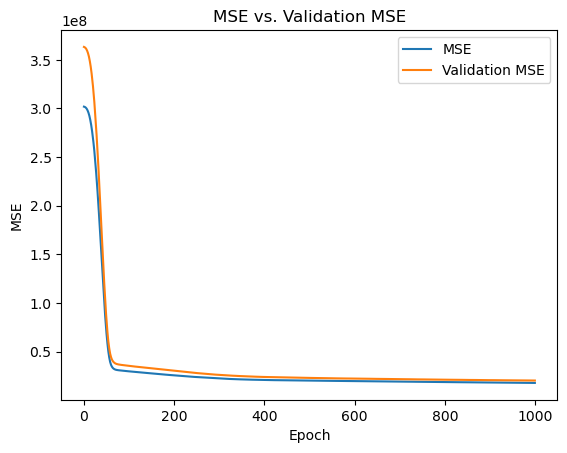

In [83]:
import matplotlib.pyplot as plt

# Your existing code

model = build_model()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    norm_train_data, train_labels,
    epochs=EPOCHS, validation_split=0.2, verbose=0,
    callbacks=[early_stop, PrintDot()]
)

# Function to plot training history
def plot_history(history):
    plt.figure()
    plt.plot(history.history['mae'], label='MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.title('MAE vs. Validation MAE')
    plt.legend()

    plt.figure()
    plt.plot(history.history['mse'], label='MSE')
    plt.plot(history.history['val_mse'], label='Validation MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title('MSE vs. Validation MSE')
    plt.legend()

    plt.show()

plot_history(history)


## As we xcan see from our  model the point it has sstopped improving then the training has stopped  thus we can see the val mse and val mae is hence  reducing thus our model perfomance is good

In [86]:
loss, mae, mse = model.evaluate(norm_test_data, test_labels, verbose=0)
print("Testing set absolute error: {:5.2f}$".format(mae))


Testing set absolute error: 3133.56$


## The mean_absolute_error form our data is 3133  a a fair perfomance    


## if we can compare from the series we  have then this model is perfoming  rather fair and almost same to the XGBOOST MODEL